# Demo Notebook simluating fixations from COCO-Search 18 with COCO-Periph

Let's stitch together images from COCO-Periph based on where humans looked during search tasks in COCO-Search 18!

**Note** we use the same functions from StitchPseudofoveated, but now we call them from the identital functions inside utils.py

In [1]:
import utils as utils
import json
import matplotlib.pyplot as plt

Readin the json file

In [2]:
json_file='./coco_search18/coco_search18_fixations_TP_train_split1.json'
with open(json_file,'r') as file:
    train = json.load(file)

Lets find a single trial for one subject and one image

In [3]:
#341060 and 543882 are examples of getting the answer wrong, and they never look at the object!
# other nice examples: #539216 557227 #570117 578092 #578751 #341060 #327191 28953 235176 121184 200206 209746 206662 139503 121184
desired_img = 392703
desired_img = str(desired_img).zfill(12) 
desired_subject = 1
im_entries = [d for d in train if (d.get('name') == desired_img+'.jpg') & (d.get('subject') == desired_subject)]
[print(i) for i in im_entries]

{'name': '000000392703.jpg', 'subject': 1, 'task': 'fork', 'condition': 'present', 'bbox': [1361, 219, 170, 413], 'X': [812.8, 1450.0, 1424.8], 'Y': [504.6, 379.3, 340.6], 'T': [232, 239, 290], 'length': 3, 'correct': 1, 'RT': 673, 'split': 'train'}
{'name': '000000392703.jpg', 'subject': 1, 'task': 'knife', 'condition': 'present', 'bbox': [1437, 206, 95, 269], 'X': [973.5, 1461.3, 1482.2], 'Y': [549.8, 348.1, 287.9], 'T': [216, 275, 797], 'length': 3, 'correct': 1, 'RT': 851, 'split': 'train'}


[None, None]

We have one trial where the subject was looking for a fork, lets extract the fixation locations from it.

In [4]:
trial = im_entries[0]
x_fixations = trial['X']
y_fixations = trial['Y']

Now readin the images from COCO-Periph for this trial, so we can pseudofoveate them.

**NOTE:** In COCO-Search 18, per the README, images have been resized to 1680x1050 with zero padding the maintain aspect ratio. So, we have to upsample them. There is a fucntion in utils.py that does this for us, but note that this changes the PPD. So 5/10/15/20 degrees no longer corresponds to 80/160/240/320 pixels.

Before: ppd 16


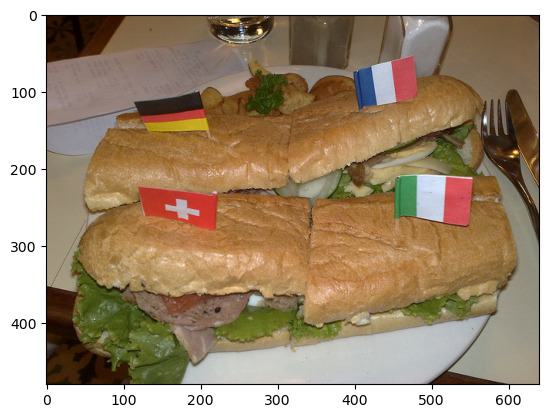

After: ppd 35.0


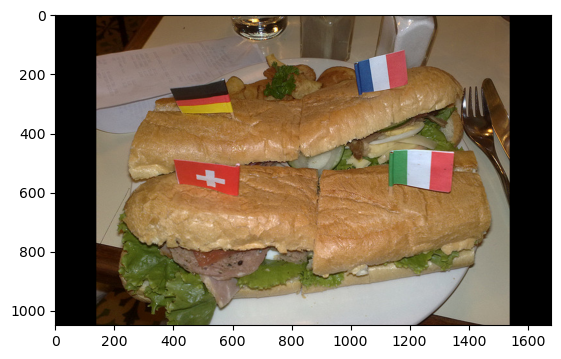

In [5]:
#readin images
uniform_imgs = utils.readin_imglist(desired_img,filepath='./ccp_search18_train_subset/')

#Take a look at resizing an image.
resized_img, new_ppd = utils.resize_img_COCO_Search(uniform_imgs[0])

print('Before: ppd 16')
plt.imshow(uniform_imgs[0])
plt.show()
print(f'After: ppd {new_ppd}')
plt.imshow(resized_img)
plt.show()

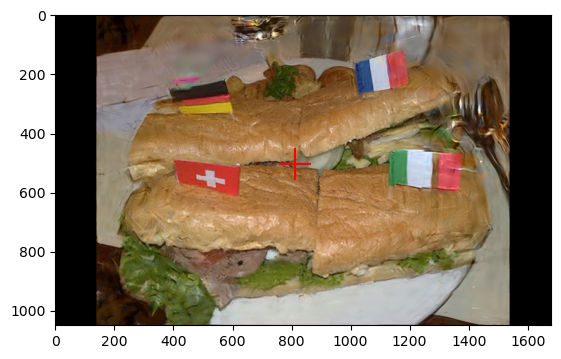

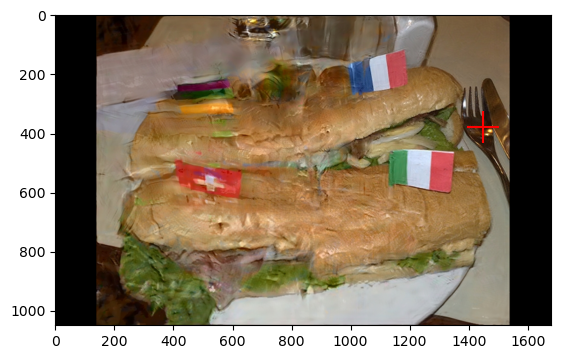

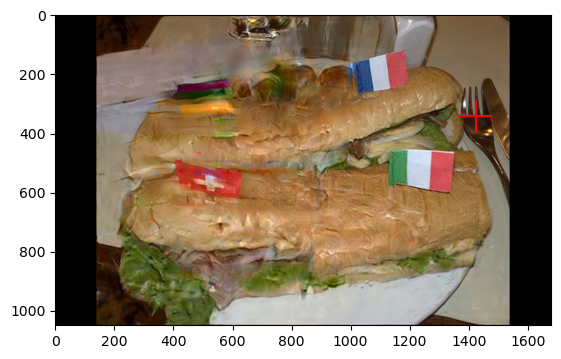

In [6]:
_, new_ppd = utils.resize_img_COCO_Search(uniform_imgs[0]) #get new ppd
uniform_imgs_resized = [utils.resize_img_COCO_Search(i)[0] for i in uniform_imgs]

for i in range(trial['length']):
    x = x_fixations[i]
    y = y_fixations[i]
    stitched_image = utils.stitch_image(uniform_imgs_resized, (x,y),ppd=new_ppd)
    plt.imshow(stitched_image)
    plt.scatter([x], [y],marker='+',s=500,c='red')
    plt.show()